In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from wordcloud import WordCloud
from wordcloud import STOPWORDS

In [ ]:
import nltk
import regex as re
#nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Python Practice/Prathamesh/DRUG RECOMMENDATION SYSTEM/data.csv")
print(data.shape)
data.head(3)

(106090, 58)


,uniqueID,drugName,condition,review,rating,date,usefulCount,review_sentiment,cleaned_review,sentiment_score,...,10,11,12,13,14,15,16,17,18,19
0,163740,mirtazapine,depression,"""I&#039;ve tried a few antidepressants over th...",10,2012-02-28,22,1,tri antidepress year citalopram fluoxetin amit...,-0.4596,...,0.065639,0.009914,0.004923,0.137026,0.008752,0.022762,0.009100,0.013640,0.089726,0.008125
1,206473,mesalamine,"crohn's disease, maintenance","""My son has Crohn&#039;s disease and has done ...",8,2009-05-17,17,1,son crohn diseas done well asacol no complaint...,0.0736,...,0.077374,0.071292,0.005803,0.183236,0.010316,0.011928,0.010726,0.016077,0.031240,0.069166
2,159672,bactrim,urinary tract infection,"""Quick reduction of symptoms""",9,2017-09-29,3,1,quick reduct symptom,0.0000,...,0.049701,0.017779,0.008829,0.220508,0.015694,0.018148,0.016318,0.024460,0.024889,0.014570


### Splitting the data to Train and Test

In [ ]:
X = data.drop(['uniqueID','review','rating','date','review_sentiment'],axis=1)
y = data['review_sentiment'].values
print(X.shape)
X.head(3)

(106090, 53)


,drugName,condition,usefulCount,cleaned_review,sentiment_score,sentiment_score_clean,year,word_count,unique_word_count,char_length,...,10,11,12,13,14,15,16,17,18,19
0,mirtazapine,depression,22,tri antidepress year citalopram fluoxetin amit...,-0.4596,0.8470,2012,38,35,260,...,0.065639,0.009914,0.004923,0.137026,0.008752,0.022762,0.009100,0.013640,0.089726,0.008125
1,mesalamine,"crohn's disease, maintenance",17,son crohn diseas done well asacol no complaint...,0.0736,-0.5423,2009,26,25,148,...,0.077374,0.071292,0.005803,0.183236,0.010316,0.011928,0.010726,0.016077,0.031240,0.069166
2,bactrim,urinary tract infection,3,quick reduct symptom,0.0000,0.0000,2017,3,3,21,...,0.049701,0.017779,0.008829,0.220508,0.015694,0.018148,0.016318,0.024460,0.024889,0.014570


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y,test_size=0.30,random_state=42)

X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train,stratify=y_train,test_size=0.30,random_state=42)

In [ ]:
print('Train data size is:',X_train.shape)
print('Cross Validation data size is:',X_cv.shape)
print('Test data size is:',X_test.shape)

Train data size is: (51984, 53)
Cross Validation data size is: (22279, 53)
Test data size is: (31827, 53)


### Encoding Categorical,Text & Numerical features

Label Encoding the condition and Year feature

In [ ]:
from sklearn.preprocessing import LabelEncoder

lab_enc_cond = LabelEncoder()

lab_enc_cond.fit(X['condition'].values)

X_train_condition = lab_enc_cond.transform(X_train['condition'].values).reshape(-1,1)
X_test_condition = lab_enc_cond.transform(X_test['condition'].values).reshape(-1,1)
X_cv_condition = lab_enc_cond.transform(X_cv['condition'].values).reshape(-1,1)

print('After Encoding')
print('Train data shape',X_train_condition.shape)
print('Test data shape',X_test_condition.shape)
print('CV data shape',X_cv_condition.shape)

After Encoding
Train data shape (51984, 1)
Test data shape (31827, 1)
CV data shape (22279, 1)


In [ ]:

lab_enc_year = LabelEncoder()

lab_enc_year.fit(X['year'].values)

X_train_year = lab_enc_year.transform(X_train['year'].values).reshape(-1,1)
X_test_year = lab_enc_year.transform(X_test['year'].values).reshape(-1,1)
X_cv_year = lab_enc_year.transform(X_cv['year'].values).reshape(-1,1)

print('After Encoding')
print('Train data shape',X_train_year.shape)
print('Test data shape',X_test_year.shape)
print('CV data shape',X_cv_year.shape)

After Encoding
Train data shape (51984, 1)
Test data shape (31827, 1)
CV data shape (22279, 1)


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import Normalizer,StandardScaler,MinMaxScaler

<b>Vectorizing the Cleaned reviews using TF-IDF </b>

In [ ]:
vect_tfidf_1 = TfidfVectorizer(min_df=10,ngram_range=(1,1))

vect_tfidf_1.fit(X_train['cleaned_review'].values) # fitted on train data only

X_train_review_tfidf_1 = vect_tfidf_1.transform(X_train['cleaned_review'].values)
X_test_review_tfidf_1 = vect_tfidf_1.transform(X_test['cleaned_review'].values)
X_cv_review_tfidf_1 = vect_tfidf_1.transform(X_cv['cleaned_review'].values)

print('After Vectorization')
print('Train data shape:',X_train_review_tfidf_1.shape)
print('Test data shape:',X_test_review_tfidf_1.shape)
print('CV data shape:',X_cv_review_tfidf_1.shape)

After Vectorization
Train data shape: (51984, 5513)
Test data shape: (31827, 5513)
CV data shape: (22279, 5513)


<b>Normalizing the Numerical features</b>

In [ ]:
columns = ['usefulCount','word_count','unique_word_count','char_length','count_punctuations','stopword_count',
               'mean_word_len','subj_count','obj_count','CARDINAL','DATE','EVENT','FAC','GPE','LANGUAGE','LAW',
            'LOC','MONEY','NORP','ORDINAL','ORG', 'PERCENT','PERSON', 'PRODUCT','QUANTITY','TIME','WORK_OF_ART',
           '0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19']

In [ ]:
normalizer = Normalizer()

X_train_num_1 = normalizer.fit_transform(X_train[columns])
X_test_num_1 = normalizer.fit_transform(X_test[columns])
X_cv_num_1 = normalizer.fit_transform(X_cv[columns])

print("After vectorizations")
print(X_train_num_1.shape, y_train.shape)
print(X_test_num_1.shape, y_test.shape)
print(X_cv_num_1.shape, y_cv.shape)



After vectorizations
(51984, 47) (51984,)
(31827, 47) (31827,)
(22279, 47) (22279,)


In [ ]:
X_train_sent_score = X_train[['sentiment_score','sentiment_score_clean']].values
X_test_sent_score = X_test[['sentiment_score','sentiment_score_clean']].values
X_cv_sent_score = X_cv[['sentiment_score','sentiment_score_clean']].values

print("After vectorizations")
print(X_train_sent_score.shape, y_train.shape)
print(X_test_sent_score.shape, y_test.shape)
print(X_cv_sent_score.shape, y_cv.shape)

After vectorizations
(51984, 2) (51984,)
(31827, 2) (31827,)
(22279, 2) (22279,)


<b>Next steps:</b>
<br>
Train the model with different set of features like:
- Train the models with TF-IDF vectorized features
- Train the model with only review extracted features
</br>

<br>
Pick the best model and evaluate the recommendation score for each drug
</br>

### Set-1: All  Extracted Features + Sentiment scores

In [ ]:
#concatenating all encoded features for set 1

from scipy.sparse import hstack
X_tr_1 = np.concatenate((X_train_num_1,X_train_sent_score),axis=1)

X_te_1 = np.concatenate((X_test_num_1,X_test_sent_score),axis=1)

X_cv_1 = np.concatenate((X_cv_num_1,X_cv_sent_score),axis=1)

print("Final Data matrix")
print(X_tr_1.shape, y_train.shape)
print(X_te_1.shape, y_test.shape)
print(X_cv_1.shape, y_cv.shape)

Final Data matrix
(51984, 49) (51984,)
(31827, 49) (31827,)
(22279, 49) (22279,)


## Modelling

In [ ]:
from sklearn.metrics import log_loss, accuracy_score,confusion_matrix, f1_score,roc_auc_score,roc_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.calibration import CalibratedClassifierCV
from tqdm import tqdm
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings("ignore")
import joblib

In [ ]:
def model_metrics(clf,train_data,test_data,cv_data):

    print('**LogLoss**')
    predict_y = clf.predict_proba(train_data)
    print ("The train log loss is:",log_loss(y_train, predict_y))
    predict_y = clf.predict_proba(cv_data)
    print( "The cross validation log loss is:",log_loss(y_cv, predict_y))
    predict_y = clf.predict_proba(test_data)
    print( "The test log loss is:",log_loss(y_test, predict_y))

    print(50*'-')

    print('**Accuracy**')
    y_pred_tr = clf.predict(train_data)
    print ("The train Accuracy is:",accuracy_score(y_train, y_pred_tr))
    y_pred_cv = clf.predict(cv_data)
    print( "The cross validation Accuracy is:",accuracy_score(y_cv, y_pred_cv))
    y_pred_te = clf.predict(test_data)
    print( "The test Accuracy is:",accuracy_score(y_test, y_pred_te))

    print(50*'-')


    print('**F1 Score**')
    print ("The train F1 score is:",f1_score(y_train, y_pred_tr))
    print( "The cross validation F1 score is:",f1_score(y_cv, y_pred_cv))
    print( "The test F1 score is:",f1_score(y_test, y_pred_te))

    print(50*'-')

    print('**AUC**')
    print ("The train AUC is:",roc_auc_score(y_train, y_pred_tr))
    print( "The cross validation AUC is:",roc_auc_score(y_cv, y_pred_cv))
    print( "The test AUC is:",roc_auc_score(y_test, y_pred_te))

    print(50*'-')

### Random Model

In [ ]:
test_len = len(y_test)
predicted_y = np.zeros((test_len,2))
for i in range(test_len):
    rand_probs = np.random.rand(1,2)
    predicted_y[i] = ((rand_probs/sum(sum(rand_probs)))[0])
print("Log loss on Test Data using Random Model",log_loss(y_test, predicted_y, eps=1e-15))

predicted_y =np.argmax(predicted_y, axis=1)

print("Accuray on Test Data using Random Model",accuracy_score(y_test, predicted_y))
print("F1 score on Test Data using Random Model",f1_score(y_test, predicted_y))
print("AUC on Test Data using Random Model",roc_auc_score(y_test, predicted_y))


Log loss on Test Data using Random Model 0.8800086794452553
Accuray on Test Data using Random Model 0.49945015238633866
F1 score on Test Data using Random Model 0.5822691874033091
AUC on Test Data using Random Model 0.49939921744949833


Number of misclassified points  50.05498476136614


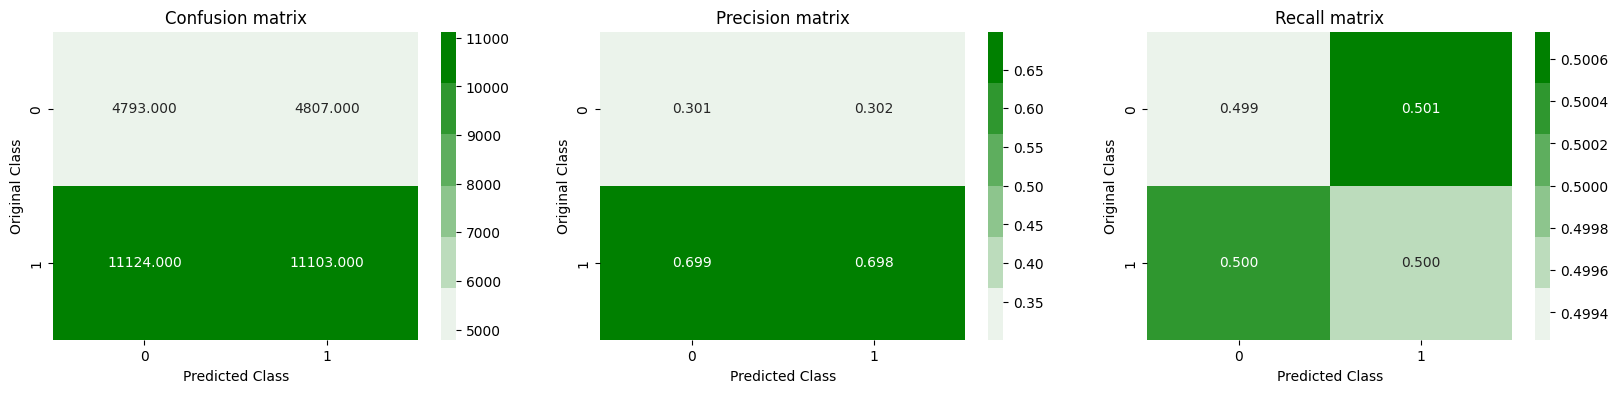

In [ ]:
plot_confusion_matrix(y_test,predicted_y)

Observation:
- The Random model shows that the worst case log loss,F1 score, Accuracy and AUC.

### K Nearest Neighbour Classification

In [ ]:
param ={'n_neighbors': [x for x in range(1, 15, 2)]}

k_cfl = KNeighborsClassifier()

random_kcfl = RandomizedSearchCV(k_cfl,param_distributions=param,scoring='f1',verbose=1,n_jobs=-1,cv=3)
random_kcfl.fit(X_tr_1,y_train)

print(random_kcfl.best_params_)


Fitting 3 folds for each of 7 candidates, totalling 21 fits
{'n_neighbors': 1}


**LogLoss**
The train log loss is: 0.486642221846536
The cross validation log loss is: 0.5297354353671754
The test log loss is: 0.5319799006192301
--------------------------------------------------
**Accuracy**
The train Accuracy is: 0.7634464450600185
The cross validation Accuracy is: 0.7327977018717178
The test Accuracy is: 0.7344393125333836
--------------------------------------------------
**F1 Score**
The train F1 score is: 0.8460854872019526
The cross validation F1 score is: 0.8266099670870591
The test F1 score is: 0.8273622288492176
--------------------------------------------------
**AUC**
The train AUC is: 0.6532547714987273
The cross validation AUC is: 0.6149347414909148
The test AUC is: 0.6181987138390246
--------------------------------------------------
Number of misclassified points  26.556068746661637


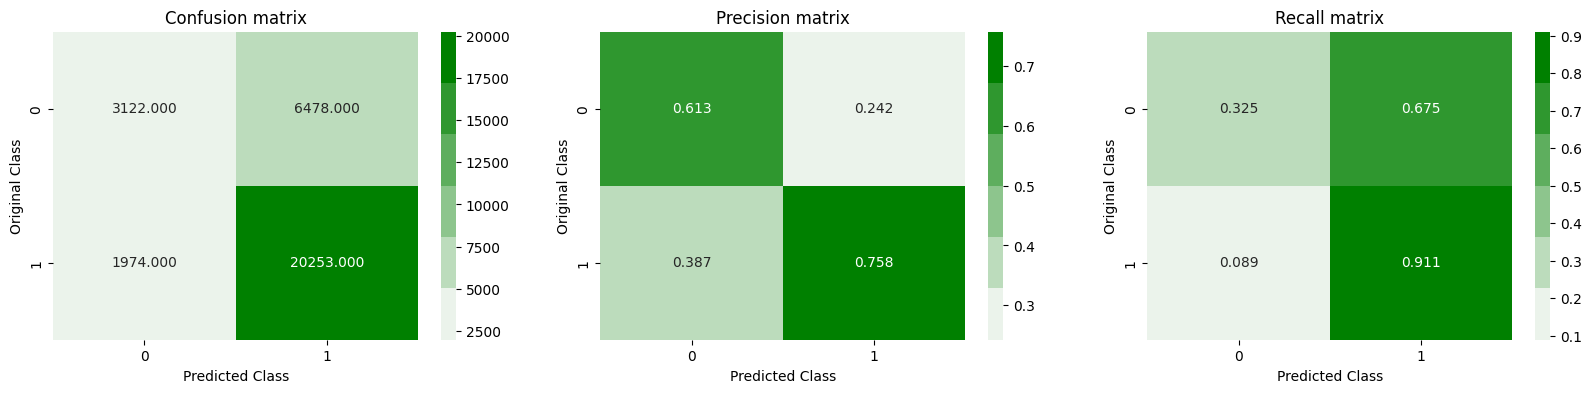

In [ ]:
k_cfl=KNeighborsClassifier(n_neighbors=13,n_jobs=-1)
k_cfl.fit(X_tr_1,y_train)
sig_clf = CalibratedClassifierCV(k_cfl, method="sigmoid")
sig_clf.fit(X_tr_1, y_train)

model_metrics(sig_clf,X_tr_1,X_te_1,X_cv_1)

plot_confusion_matrix(y_test, sig_clf.predict(X_te_1))


### Logistic Regression

In [ ]:
param = {'C':[10 ** x for x in range(-5, 4)]}

logisticR=LogisticRegression(penalty='l2',class_weight='balanced')

random_lr = RandomizedSearchCV(logisticR,param_distributions=param,scoring='f1',verbose=1,n_jobs=-1,cv=3)
random_lr.fit(X_tr_1,y_train)

print(random_lr.best_params_)


Fitting 3 folds for each of 9 candidates, totalling 27 fits
{'C': 1000}


**LogLoss**
The train log loss is: 0.5365317639141334
The cross validation log loss is: 0.535775042398672
The test log loss is: 0.5388120544202494
--------------------------------------------------
**Accuracy**
The train Accuracy is: 0.7329562942443829
The cross validation Accuracy is: 0.7320795367835181
The test Accuracy is: 0.7293807144876991
--------------------------------------------------
**F1 Score**
The train F1 score is: 0.8243585201680247
The cross validation F1 score is: 0.8236684292930785
The test F1 score is: 0.8223134528500403
--------------------------------------------------
**AUC**
The train AUC is: 0.6248494150304459
The cross validation AUC is: 0.6242692514132075
The test AUC is: 0.6193702760156566
--------------------------------------------------
Number of misclassified points  27.061928551230086


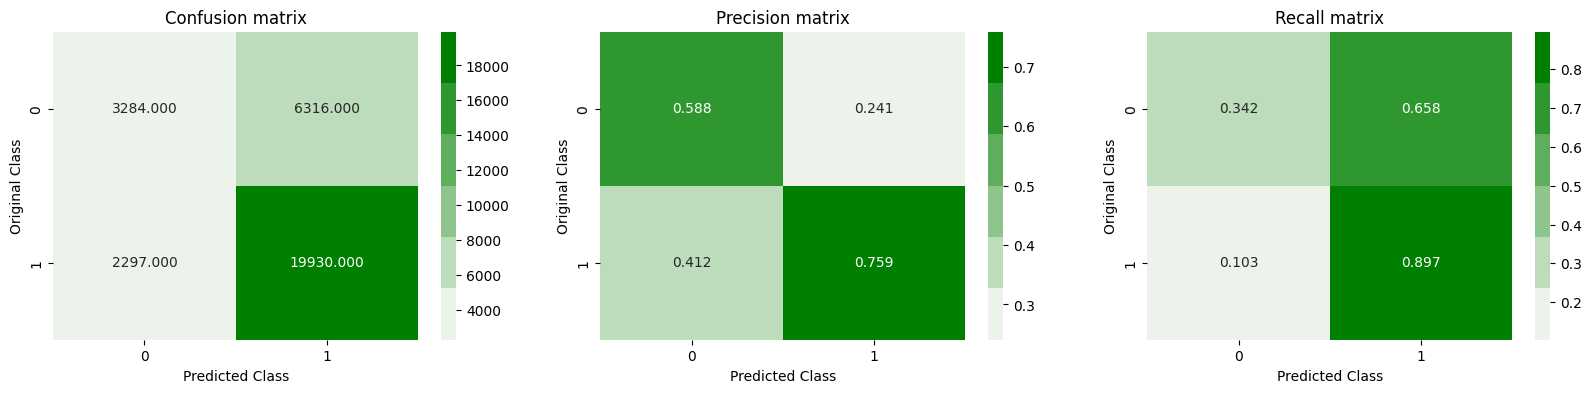

In [ ]:
logisticR=LogisticRegression(C=100 ,penalty='l2',class_weight='balanced',n_jobs=-1)
logisticR.fit(X_tr_1,y_train)
sig_clf = CalibratedClassifierCV(logisticR, method="sigmoid")
sig_clf.fit(X_tr_1, y_train)


model_metrics(sig_clf,X_tr_1,X_te_1,X_cv_1)

plot_confusion_matrix(y_test, sig_clf.predict(X_te_1))

### Linear Support Vector Classification

In [ ]:
param= {'C':[0.001,1,10,100]}

linSVC=LinearSVC(penalty='l2',loss='hinge')

random_svc = RandomizedSearchCV(linSVC,param_distributions=param,scoring='f1',verbose=1,n_jobs=-1,cv=3)
random_svc.fit(X_tr_1,y_train)

print(random_svc.best_params_)


Fitting 3 folds for each of 4 candidates, totalling 12 fits
{'C': 0.001}


**LogLoss**
The train log loss is: 0.5624501466797063
The cross validation log loss is: 0.5633560346160407
The test log loss is: 0.565633666445832
--------------------------------------------------
**Accuracy**
The train Accuracy is: 0.7117189904586027
The cross validation Accuracy is: 0.7104896988195162
The test Accuracy is: 0.7102460175322839
--------------------------------------------------
**F1 Score**
The train F1 score is: 0.8203376013043688
The cross validation F1 score is: 0.8197619180685185
The test F1 score is: 0.8191622872382147
--------------------------------------------------
**AUC**
The train AUC is: 0.5600089184527932
The cross validation AUC is: 0.5577509830093745
The test AUC is: 0.5593356475232826
--------------------------------------------------
Number of misclassified points  28.97539824677161


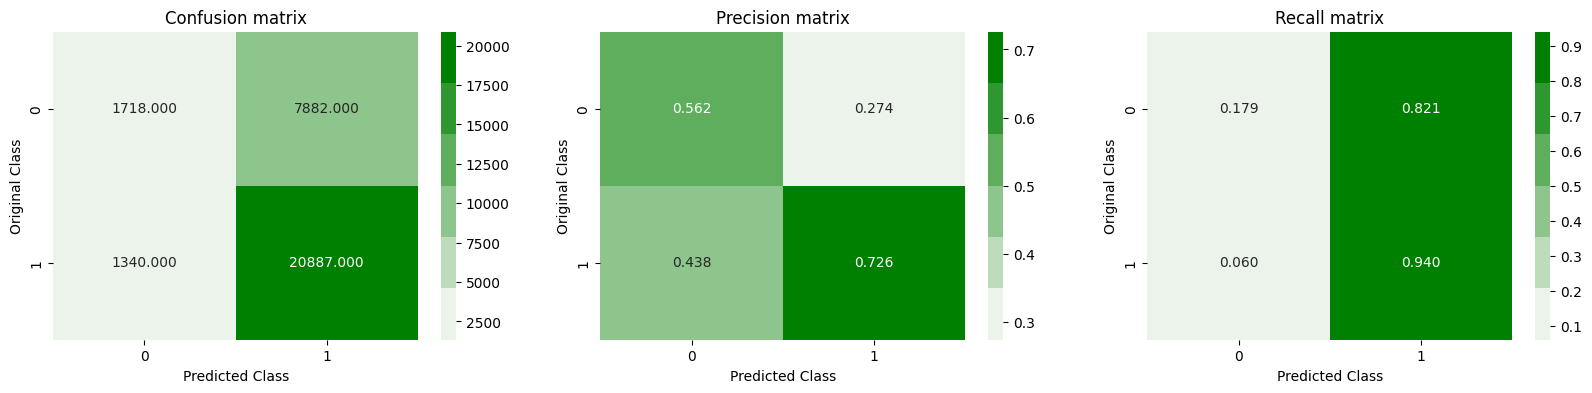

In [ ]:
linSVC=LinearSVC(C=0.001 ,penalty='l2',loss='hinge')
linSVC.fit(X_tr_1,y_train)
sig_clf = CalibratedClassifierCV(linSVC, method="sigmoid")
sig_clf.fit(X_tr_1, y_train)


model_metrics(sig_clf,X_tr_1,X_te_1,X_cv_1)

plot_confusion_matrix(y_test, sig_clf.predict(X_te_1))

### Random Forest Classifier

In [ ]:
param = {'n_estimators':[100,500,1000,2000,3000]}

rf_clf =RandomForestClassifier(random_state=42,n_jobs=-1)

random_rf = RandomizedSearchCV(rf_clf,param_distributions=param,scoring='f1',verbose=0,n_jobs=-1,cv=3)
random_rf.fit(X_tr_1,y_train)

print(random_rf.best_params_)

{'n_estimators': 3000}


In [ ]:
rf_clf =RandomForestClassifier(n_estimators=3000 ,random_state=42,n_jobs=-1)
rf_clf.fit(X_tr_1,y_train)
sig_clf = CalibratedClassifierCV(rf_clf, method="sigmoid")
sig_clf.fit(X_tr_1, y_train)


model_metrics(sig_clf,X_tr_1,X_te_1,X_cv_1)

plot_confusion_matrix(y_test, sig_clf.predict(X_te_1))

### XGBOOST Classifier

In [ ]:
param = {'n_estimators':[100,500,1000,2000,3000]}

x_clf =XGBClassifier(nthread=-1,eval_metric='logloss',objective='binary:logistic', random_state=0)

random_xgb = RandomizedSearchCV(x_clf,param_distributions=param,scoring='f1',verbose=0,n_jobs=-1,cv=3)
random_xgb.fit(X_tr_1,y_train)

print(random_xgb.best_params_)

In [ ]:
#https://machinelearningmastery.com/avoid-overfitting-by-early-stopping-with-xgboost-in-python/

eval_set = [(X_tr_1, y_train), (X_te_1, y_test)]

x_clf =XGBClassifier(n_estimators=3000,nthread=-1,eval_metric='logloss',objective='binary:logistic',random_state=0)
x_clf.fit(X_tr_1,y_train,eval_set=eval_set,verbose=0)
sig_clf = CalibratedClassifierCV(x_clf, method="sigmoid")
sig_clf.fit(X_tr_1, y_train)


model_metrics(sig_clf,X_tr_1,X_te_1,X_cv_1)

results = x_clf.evals_result()
epochs = len(results['validation_0']['logloss'])
x_axis = range(0, epochs)
# plot log loss
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['logloss'], label='Train')
ax.plot(x_axis, results['validation_1']['logloss'], label='Test')
ax.legend()
plt.ylabel('Log Loss')
plt.title('XGBoost Log Loss')
plt.show()


plot_confusion_matrix(y_test, sig_clf.predict(X_te_1))

<b> Observations:</b>
- For all the numerical features, the Random Forest and XGB Classifiers works well but both of them are observed to be overfitting. We need to tune the hyperparameters to avoid overfitting in later stages.
- Using Random Forest classifier, the important numerical features can be selected for further modelling.

In [ ]:
columns = ['usefulCount', 'sentiment_score', 'sentiment_score_clean', 'word_count',
       'unique_word_count', 'char_length', 'count_punctuations',
       'stopword_count', 'mean_word_len', 'subj_count', 'obj_count',
       'CARDINAL', 'DATE', 'EVENT', 'FAC', 'GPE', 'LANGUAGE', 'LAW', 'LOC',
       'MONEY', 'NORP', 'ORDINAL', 'ORG', 'PERCENT', 'PERSON', 'PRODUCT',
       'QUANTITY', 'TIME', 'WORK_OF_ART', '0', '1', '2', '3', '4', '5', '6',
       '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18',
       '19']

In [ ]:
# https://chrisalbon.com/code/machine_learning/trees_and_forests/feature_selection_using_random_forest/
# https://towardsdatascience.com/feature-selection-using-random-forest-26d7b747597f

from sklearn.feature_selection import SelectFromModel

def feature_selection_RF(classifier,train_data):

    '''this function takes classifier and data as input and returns the columns/features need to be dropped'''

    model = SelectFromModel(classifier,prefit=True)

    X_new = model.transform(train_data)

    print('Important features count from RF feature importance are:',X_new.shape)

    idx = list(model.get_support())
    col= np.array(columns)
    imp_col = col[idx]
    all_col = columns
    drop_col=[]
    for i in all_col:
        if i not in imp_col:
            drop_col.append(i)
    print('Count of features to be dropped:',len(drop_col))

    return drop_col


In [ ]:
drop_col = feature_selection_RF(rf_clf,X_tr_1) # feature selection using RF feature importances

In [ ]:
drop_col

- From Random Forest feature selection, 20 features can be dropped from our dataset and consider the 29 features for next step of modelling

In [ ]:
drop_col = ['subj_count', 'obj_count', 'CARDINAL', 'DATE', 'EVENT', 'FAC', 'GPE', 'LANGUAGE', 'LAW', 'LOC', 'MONEY',
 'NORP', 'ORDINAL', 'ORG', 'PERCENT', 'PERSON', 'PRODUCT', 'QUANTITY', '9', '14']

In [ ]:
X_train = X_train.drop(drop_col,axis=1)
X_test = X_test.drop(drop_col,axis=1)
X_cv = X_cv.drop(drop_col,axis=1)

print("After dropping the columns the new shapes are:")
print('Train data size:',X_train.shape)
print('Test data size:',X_test.shape)
print('CV data size:',X_cv.shape)

In [ ]:
X_train.columns

Index(['drugName', 'condition', 'usefulCount', 'cleaned_review',
       'sentiment_score', 'sentiment_score_clean', 'year', 'word_count',
       'unique_word_count', 'char_length', 'count_punctuations',
       'stopword_count', 'mean_word_len', 'TIME', 'WORK_OF_ART', '0', '1', '2',
       '3', '4', '5', '6', '7', '8', '10', '11', '12', '13', '15', '16', '17',
       '18', '19'],
      dtype='object')

In [ ]:
imp_columns = ['usefulCount','word_count', 'unique_word_count', 'char_length', 'count_punctuations',
       'stopword_count', 'mean_word_len', 'TIME', 'WORK_OF_ART', '0', '1', '2',
               '3', '4', '5', '6', '7', '8', '10', '11', '12', '13', '15', '16', '17', '18', '19']


In [ ]:
# Normalizing the features after dropping the unimportant features

normalizer = Normalizer()

X_train_num_2 = normalizer.fit_transform(X_train[imp_columns])
X_test_num_2 = normalizer.fit_transform(X_test[imp_columns])
X_cv_num_2 = normalizer.fit_transform(X_cv[imp_columns])

print("After vectorizations")
print(X_train_num_2.shape, y_train.shape)
print(X_test_num_2.shape, y_test.shape)
print(X_cv_num_2.shape, y_cv.shape)


### Set - 1 : Important Numerical Features + Sentiment Scores

In [ ]:
#concatenating all encoded features for set 1

from scipy.sparse import hstack
X_tr_1 = np.concatenate((X_train_num_2,X_train_sent_score),axis=1)

X_te_1 = np.concatenate((X_test_num_2,X_test_sent_score),axis=1)

X_cv_1 = np.concatenate((X_cv_num_2,X_cv_sent_score),axis=1)

print("Final Data matrix")
print(X_tr_1.shape, y_train.shape)
print(X_te_1.shape, y_test.shape)
print(X_cv_1.shape, y_cv.shape)

#### HyperParameter Tuning on XGBClassifier

In [ ]:
x_cfl_1 = XGBClassifier()
prams={
'learning_rate':[0.01,0.03,0.05,0.1,0.15,0.2],
'n_estimators':[100,500,1000,2000,3000],
'max_depth':[3,5,7,10,30,50],
'colsample_bytree':[0.1,0.3,0.5,1],
'subsample':[0.1,0.3,0.5,1]
}
x_random_cfl_1 = RandomizedSearchCV(x_cfl_1,param_distributions=prams,verbose=0,n_jobs=-1,cv=3,scoring='f1')
x_random_cfl_1.fit(X_tr_1,y_train)

print(x_random_cfl_1.best_params_)
print(x_random_cfl_1.best_score_)

#### Training the XGB Classifier with Best parameters

In [ ]:

# Here early stopping parameter has been used as in the above xgboost model there is an overfitting
# occured with same 3000 estimators


eval_set = [(X_tr_1, y_train), (X_cv_1, y_cv)]

x_cfl_1=XGBClassifier(n_estimators=3000,subsample=1,max_depth=30,learning_rate=0.2,colsample_bytree=0.5,nthread=-1,objective='binary:logistic', random_state=0)
x_cfl_1.fit(X_tr_1,y_train,eval_set=eval_set,eval_metric='logloss',verbose=0,early_stopping_rounds=30)
x_sig_clf_1 = CalibratedClassifierCV(x_cfl_1, method="sigmoid")
x_sig_clf_1.fit(X_tr_1, y_train)

model_metrics(x_sig_clf_1,X_tr_1,X_te_1,X_cv_1)

results = x_cfl_1.evals_result()
epochs = len(results['validation_0']['logloss'])
x_axis = range(0, epochs)
# plot log loss
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['logloss'], label='Train')
ax.plot(x_axis, results['validation_1']['logloss'], label='Test')
ax.legend()
plt.ylabel('Log Loss')
plt.title('XGBoost Log Loss')
plt.show()


plot_confusion_matrix(y_test, x_sig_clf_1.predict(X_te_1))

<b>Observations:
- The XGB classifier with hyper parameter tuning performs well on Set 1 features with log loss of 0.3998 and F1 scoe of 0.895
- This model is saved for Set 1 features


### Model Evaluation Metrics summary

### Recommendation system

In [ ]:
def userful_count(data,feature):
    '''this function takes dataframe and feature as input and normalize the given feature'''

    max_value = data[feature].max()
    min_value = data[feature].min()
    data[feature] = (data[feature] - min_value) / (max_value - min_value)
    return data

In [ ]:

# Each model predictions are stored as one column and recommendation score is calculated by adding predictions
# of 5 models multiplied by its normalized useful count

X_test['model2'] = model_2.predict(X_te_2)
X_test['model3'] = model_3.predict(X_te_3)
X_test['model4'] = model_4.predict(X_te_4)
X_test['model5'] = model_5.predict(X_te_5)
X_test['model6'] = model_6.predict(X_te_6)

X_test =  userful_count(X_test,'usefulCount')
#X_test['usefulCount'] = X_test['usefulCount']/X_test['user_size']

X_test['rec_score'] = (X_test['model2']+X_test['model3']+X_test['model4']+X_test['model5']+X_test['model6'])*X_test['usefulCount']

X_test.head()

In [ ]:
#X_test.to_csv('validation_data.csv',index=False)

In [ ]:
# grouping the datafrom with respect to condition and drugname.

df = X_test.groupby(['condition','drugName']).agg({'rec_score':['sum']})


In [ ]:
df.tail()

<b> Validation for one condition </b>

In [ ]:
X_test[X_test['condition']=='zen shoulde'].sort_values(by=['rec_score'],ascending=False)

<b> Observations:</b>
- The drug named 'diclofenac' for condition 'zen shoulde' is present two times. Based on the 5 models prediction and useful count, the recommendation score is calculated. The final score of each drug is calculated by addition of same drugs score for a given condition. Hence for this condition,'diclofenac' this drug is recommended with high score

- Based on some observations like for condition 'birth control' we have total of 11563 entries for different drugs used. And for each drug for ex- 'etonogestrel(1309)','ethinyl estradiol / norethindrone(909)','levonorgestrel(850)' we have many entries. By aggreating the rec_score using 'mean' the score for these highly used drugs gets lowered due to which the lowest rated/used drugs are recommended after aggregation.
- Hence aggregating using 'sum' is used in which scores of same drugs are added together.

In [ ]:
def recommend(condition):
    '''this function takes the given condition as input and returns the top drugs based on highest rec scores'''
    data = pd.read_csv('validation_data.csv')
    select = data[data['condition']==condition]
    drug_count = select['drugName'].nunique()
    select['rec_score'] = select['rec_score']/drug_count
    group_drug = select.groupby(['drugName']).agg({'rec_score':['sum']})
    group_drug = group_drug[('rec_score', 'sum')].sort_values(ascending=False)
    drug_score = dict(group_drug)
    if len(drug_score)>5:
        print('Top 5 Drugs for the condition : {0}'.format(condition.upper()))
        for i in list(drug_score.keys())[0:5]:
            print('->',i)

    else:
        print('Top  Drugs for the condition : {0}'.format(condition.upper()))
        for i in drug_score.keys():
            print('->',i)


In [ ]:
recommend('birth control')

In [ ]:
recommend('zen shoulde')